In [1]:
import sys
sys.path.append("../")
from tfMFs.tfCMF import tfCMF
from dataset import create_synthetic_data
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [11]:
def synthetic_experiment(num_pos_users=2000, num_neg_users=2000, num_random_words=10000,
                        lam=None, shape=0.1, scale=0.5, dim = 10,optim_steps=100, init="svd"):
    
    X, y = create_synthetic_data(
        num_pos_users=num_pos_users, 
        num_neg_users=num_neg_users, 
        num_random_words=num_random_words,
        lam=lam, 
        shape=shape, 
        scale=scale
    )
    print(f"sparsity = {X.nnz / (X.shape[0] * X.shape[1])}")
    y = y[:,np.newaxis]
    X_train = X.A
    X_valid = X.A
    
    cmf_SGD = tfCMF(alpha=0.7, d_hidden=dim, lamda=1)
    U, V, Z, train_loss_SGD, _ = cmf_SGD.train(X_train, X_valid, y, optim_steps=optim_steps, early_stopping=5, lr=0.001, optimizer="SGD",init=init )
    
    cmf_Adam = tfCMF(alpha=0.7, d_hidden=dim, lamda=1)
    U, V, Z, train_loss_Adam, _ = cmf_SGD.train(X_train, X_valid, y, optim_steps=optim_steps, early_stopping=5, lr=0.001, optimizer="Adam", init=init)
    
    plt.plot(np.arange(0,optim_steps),train_loss_SGD, label="SGD")
    plt.plot(np.arange(0,optim_steps),train_loss_Adam, label="Adam")
    plt.legend()
    plt.show()

# スパース性

## small data

sparsity = 0.0394625


100%|██████████| 100/100 [00:13<00:00,  7.43it/s]


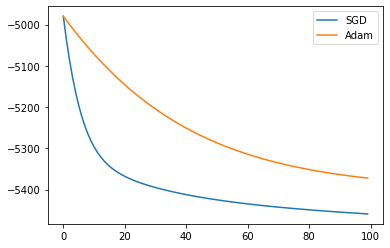

In [19]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.0183


100%|██████████| 100/100 [00:13<00:00,  7.69it/s]


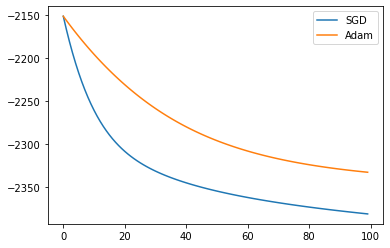

In [20]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.05, # sparsity medium
    scale=0.5,
    dim = 10
)

sparsity = 0.0033525


100%|██████████| 100/100 [00:12<00:00,  8.23it/s]


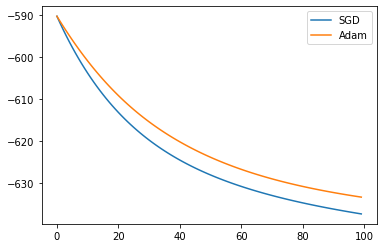

In [21]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.01, # sparsity high
    scale=0.5,
    dim = 10
)

## medium data

sparsity = 0.03753533333333333


100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


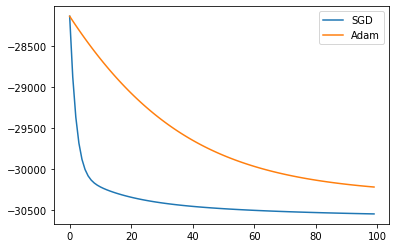

In [22]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.019851


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


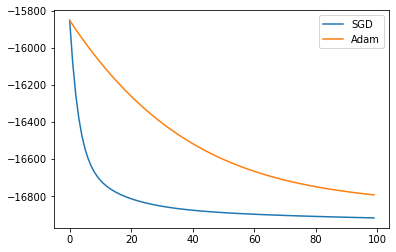

In [23]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.05, # sparsity medium
    scale=0.5,
    dim = 10
)

sparsity = 0.004606666666666667


100%|██████████| 100/100 [00:22<00:00,  4.35it/s]


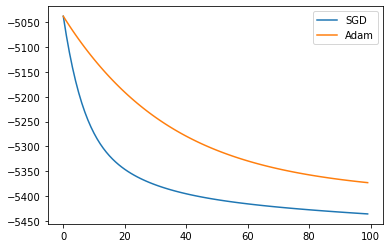

In [24]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.01, # sparsity low
    scale=0.5,
    dim = 10
)

sparsity = 0.00046533333333333333


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


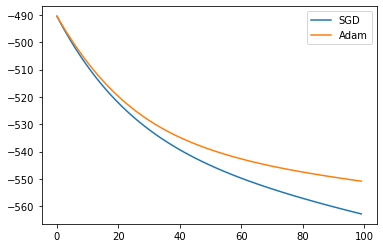

In [35]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.001, # sparsity low
    scale=0.5,
    dim = 10
)

# 潜在次元数

## small data

100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


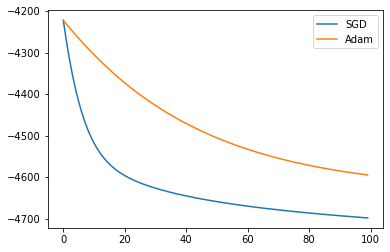

In [7]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 # small dim
)

100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


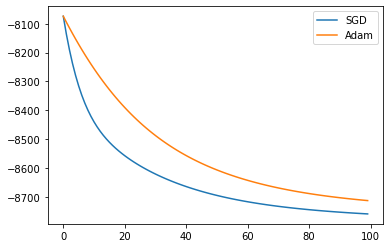

In [9]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 # medium dim
)

100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


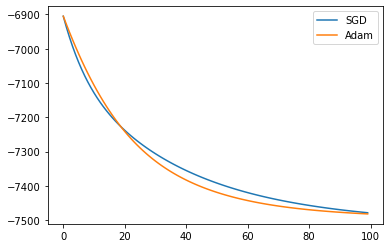

In [10]:
synthetic_experiment(
    num_pos_users=200, # small size
    num_neg_users=200, # small size
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 100 # large dim
)

## medium data

sparsity = 0.040698


100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


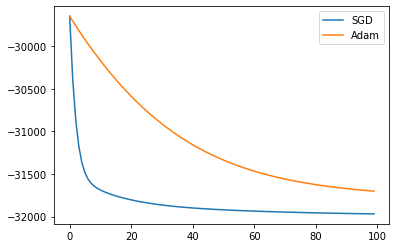

In [14]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 # small dim
)

sparsity = 0.039626666666666664


100%|██████████| 100/100 [00:08<00:00, 12.06it/s]


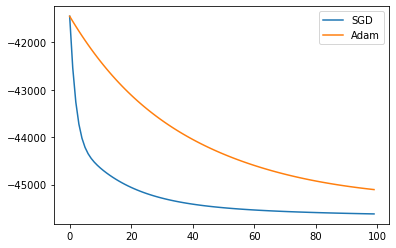

In [36]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 50 # medium dim
)

sparsity = 0.03908866666666667


100%|██████████| 100/100 [00:09<00:00, 10.02it/s]


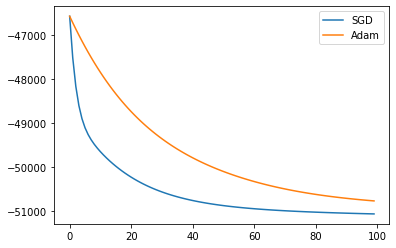

In [15]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 100 # medium dim
)

sparsity = 0.039894


100%|██████████| 100/100 [00:11<00:00,  8.68it/s]


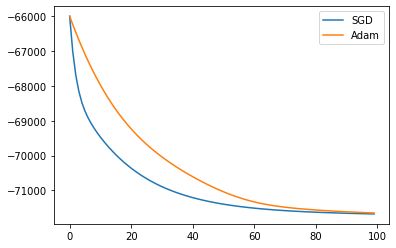

In [16]:
synthetic_experiment(
    num_pos_users=500, # medium size
    num_neg_users=500, # medium size
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 250 # large dim
)

# 不均衡性

  5%|▌         | 5/100 [00:00<00:01, 47.86it/s]

sparsity = 0.04092


100%|██████████| 100/100 [00:01<00:00, 52.23it/s]


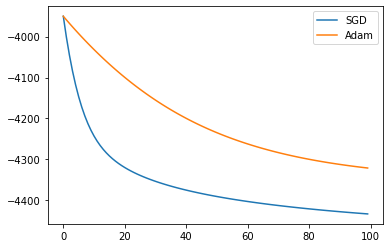

In [5]:
synthetic_experiment(
    num_pos_users=80, # little imbalance
    num_neg_users=320, # little imbalance
    num_random_words=1000, # small size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

  5%|▌         | 5/100 [00:00<00:01, 47.53it/s]

sparsity = 0.0398925


100%|██████████| 100/100 [00:01<00:00, 52.08it/s]


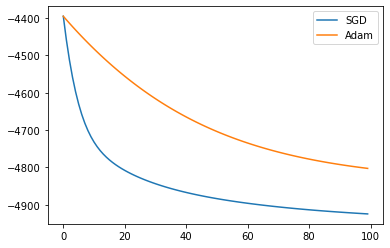

In [6]:
synthetic_experiment(
    num_pos_users=40, # medium imbalance
    num_neg_users=360, # medium imbalance
    num_random_words=1000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

  0%|          | 0/100 [00:00<?, ?it/s]

sparsity = 0.036361


100%|██████████| 100/100 [00:02<00:00, 34.76it/s]


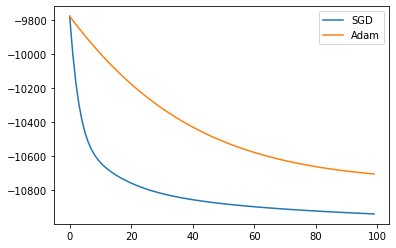

In [8]:
synthetic_experiment(
    num_pos_users=4, # high imbalance
    num_neg_users=996, # high imbalance
    num_random_words=1000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.040807333333333334


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


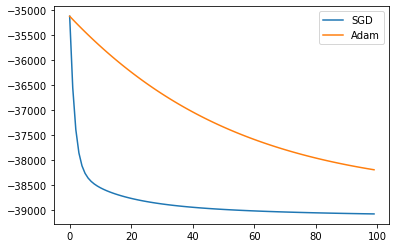

In [4]:
synthetic_experiment(
    num_pos_users=200, # little imbalance
    num_neg_users=800, # little imbalance
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.04176933333333333


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


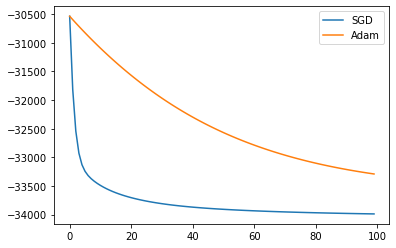

In [27]:
synthetic_experiment(
    num_pos_users=100, # medium imbalance
    num_neg_users=900, # medium imbalance
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)

sparsity = 0.04276733333333333


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


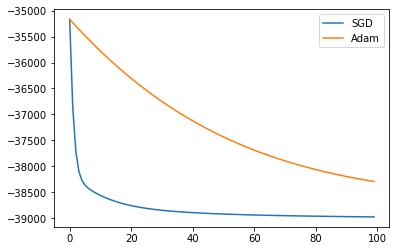

In [29]:
synthetic_experiment(
    num_pos_users=10, # high imbalance
    num_neg_users=990, # high imbalance
    num_random_words=3000, # medium size
    lam=None, 
    shape=0.1, 
    scale=0.5,
    dim = 10 
)